<a href="https://colab.research.google.com/github/itsshuvra/Boston-House-Price-Prediction/blob/main/theBostonHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Example of supervised learning**

<p align='justify'>We can devide supervised learning into two subcategories: Classification and regression.

A regression problem is when the output variable is a real or continuous value, such as “salary” or “weight”. Many different models can be used, the simplest is the linear regression. It tries to fit data with the best hyper-plane which goes through the points.

Here we are going to solve a famous regression learning problem by using linear regression model and many others. </p>

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of [Boston MA](http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). The following describes the dataset columns:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

In [ ]:
#import some libraries
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.datasets import load_boston # load the dataset
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#know about the dataset completely
#first load ta datset and print its keys
boston_dataset = load_boston()
print("keys:",boston_dataset.keys())

keys: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [ ]:
#label values of the dateset
print("target:",boston_dataset['target'][:5])

target: [24.  21.6 34.7 33.4 36.2]


In [ ]:
#print the shape of data
print("shape of data:",boston_dataset['data'].shape) 
#display some data
print("Data:\n",boston_dataset['data'][:5])

shape of data: (506, 13)
Data:
 [[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]]


In [ ]:
#features list, from which we are going to analysis and make model
print("features name:", boston_dataset['feature_names'])
#already described the short terms of the feature_names above.

features name: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [ ]:
#above data is looked like messy enough
#convert it to a dataframe for a better look
boston_df = pd.DataFrame(boston_dataset['data'], columns=boston_dataset['feature_names'])
#use display for the clear look
display(boston_df.head()) #head for upper five rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
#add target data into the feature list
boston_df['PRICE'] = boston_dataset.target
display(boston_df.head()) #head for upper five rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
#statistics 
boston_df.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
#number of unique values
boston_df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

In [ ]:
#see if there is any null values and sum of these null values
boston_df.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [ ]:
#see rows with null values
boston_df[boston_df.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE


In [ ]:
#see correlation between the features
crtn = boston_df.corr()
print(crtn.shape)

(14, 14)


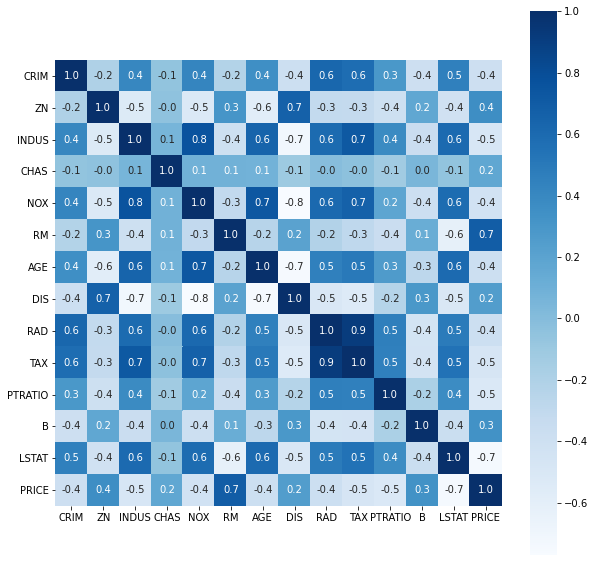

In [ ]:
#now see your data by plotting
plt.figure(figsize=(10,10))
sns.heatmap(crtn, square=True, fmt='.1f', annot=True, cmap='Blues')

In [ ]:
#now split the dataset
#import train_test_split to split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(boston_dataset['data'], boston_dataset['target'], random_state=4) 
print("X train Shape:", X_train.shape) #shape of the training data which is 75%

X train Shape: (379, 13)


In [ ]:
#display the data by which we are gonna train the model
print("X train data:\n", X_train[:5])

X train data:
 [[7.05042e+00 0.00000e+00 1.81000e+01 0.00000e+00 6.14000e-01 6.10300e+00
  8.51000e+01 2.02180e+00 2.40000e+01 6.66000e+02 2.02000e+01 2.52000e+00
  2.32900e+01]
 [1.15172e+00 0.00000e+00 8.14000e+00 0.00000e+00 5.38000e-01 5.70100e+00
  9.50000e+01 3.78720e+00 4.00000e+00 3.07000e+02 2.10000e+01 3.58770e+02
  1.83500e+01]
 [1.33598e+01 0.00000e+00 1.81000e+01 0.00000e+00 6.93000e-01 5.88700e+00
  9.47000e+01 1.78210e+00 2.40000e+01 6.66000e+02 2.02000e+01 3.96900e+02
  1.63500e+01]
 [5.26930e-01 0.00000e+00 6.20000e+00 0.00000e+00 5.04000e-01 8.72500e+00
  8.30000e+01 2.89440e+00 8.00000e+00 3.07000e+02 1.74000e+01 3.82000e+02
  4.63000e+00]
 [7.50260e-01 0.00000e+00 8.14000e+00 0.00000e+00 5.38000e-01 5.92400e+00
  9.41000e+01 4.39960e+00 4.00000e+00 3.07000e+02 2.10000e+01 3.94330e+02
  1.63000e+01]]


Train the model

In [ ]:
#first train the model
from sklearn.linear_model import LinearRegression

#create a Linear Regression
lr = LinearRegression()

#use training set
lr.fit(X_train, y_train)

#find the value of b
lr.intercept_

37.51003619792181

In [ ]:
#see the coefficient values of X_train
codf = pd.DataFrame(X_train)
coeffcients = pd.DataFrame([codf.columns,lr.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
display(coeffcients)

,Attribute,Coefficients
0,0.0,-0.118902
1,1.0,0.050569
2,2.0,-0.010743
3,3.0,3.661849
4,4.0,-15.295733
5,5.0,3.393162
6,6.0,-0.005912
7,7.0,-1.492344
8,8.0,0.333696
9,9.0,-0.015059


**Evaluate the model**

In [ ]:
#predict the model
yprd = lr.predict(X_train)

In [ ]:
#print the evaluations
print('R^2:',metrics.r2_score(y_train, yprd))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, yprd))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, yprd))
print('MSE:',metrics.mean_squared_error(y_train, yprd))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, yprd)))

R^2: 0.7375227021436395
Adjusted R^2: 0.7281741956446458
MAE: 3.1513405556701373
MSE: 20.54926467081804
RMSE: 4.533129677255885


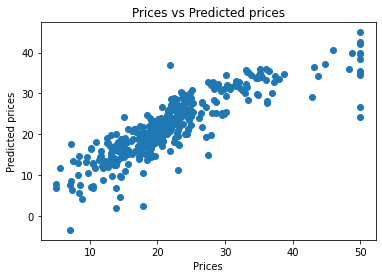

In [ ]:
plt.scatter(y_train, yprd)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

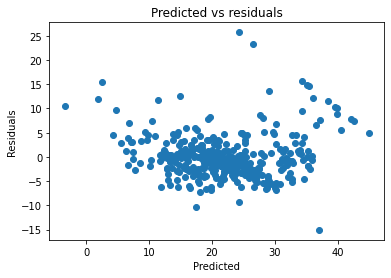

In [ ]:
plt.scatter(yprd,y_train-yprd)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


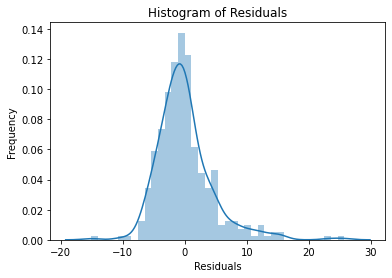

In [ ]:
sns.distplot(y_train-yprd)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

For test data

In [ ]:
# Predicting Test data
y_test_pred = lr.predict(X_test)

In [ ]:
print('R^2:', metrics.r2_score(y_test, y_test_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7313816523148393
Adjusted R^2: 0.7004786565634491
MAE: 3.6345669218826493
MSE: 26.951425624235853
RMSE: 5.1914762471031155
